This notebook acts as a continuous *verification* that we are consistent with Mamon and Lokas's sigma distribution.

In [1]:
# Imports

import numpy as np
import sys
import matplotlib.pyplot as plt
from itertools import cycle

from colossus.cosmology import cosmology
cosmo = cosmology.setCosmology("planck18")
from colossus.halo import profile_nfw
from colossus.halo import concentration

sys.path.insert(0, "../../GalaxyTools/")
import HM2SM
import SDSSExtractor
import darkmatter

sys.path.insert(0, "../")
import SigmaLib

In [2]:
# Variables

# Halo things
halo_mass = 12.
m12 = 0.7*(10**(halo_mass-12))
concentration = 10.2 * m12**-0.08

nfw  = profile_nfw.NFWProfile(M = 1E12, c = 10.0, z = 0.0, mdef = 'vir') # Dummy
rho, rs = nfw.fundamentalParameters( (10**halo_mass) * 0.7, concentration, 0.0, 'vir')

rs /= 0.7
rho *= 0.7**2

SM = 11.086
Re = 3.2
n = 3.12

BHMass = 8.26

length = 20
R_range = np.logspace(-2, 3, length)

In [7]:

sig_full = SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile = 'NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[True, False, True, True],
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")


sig_justStars =  SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile = 'NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[True, False, False, False],
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")


sig_justDM = SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile = 'NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[False, False, True, False],
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")


sig_justBH =  SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile ='NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[False, False, False, True],
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")





In [8]:
ml_data_tot =  np.array([[0.01000000000000001, 183.5646154491867],
                            [0.015907901866580428, 175.53453553423736],
                            [0.03281927872511476, 175.3821770690025],
                            [0.05418398816541044, 177.22318545357044],
                            [0.07710752692535532, 179.11542071403608],
                            [0.109729292912032, 179.03966373070492],
                            [0.16663805717400718, 179.94084979150972],
                            [0.22849198351169275, 179.8727533446731],
                            [0.33434401112557777, 178.80064144310205],
                            [0.5945570708544394, 174.77406448437765],
                            [0.9113336771446099, 168.99197992654572],
                            [1.504594101251712, 163.386633165437],
                            [2.3934935311747987, 158.84895926413787],
                            [3.601236248389732, 154.44762453804674],
                            [5.124805876960932, 152.68674822783242],
                            [7.568891123391602, 150.10806895184166],
                            [15.907901866580412, 149.14859588479717],
                            [26.26363527653333, 147.4218730097156],
                            [42.56300264549495, 147.33655562668827],
                            [60.570068458094134, 147.27423953495153],
                            [118.18997619088928, 147.1562392109228],
                            [198.78659591254743, 147.06452654960492]])

mlap_data_stars = np.array([[0.01000000000000001, 142.3892551591794],
                            [0.014363426769165097, 149.5792644296602],
                            [0.019512934226359652, 152.86363040639912],
                            [0.028027260181185194, 158.81889918241853],
                            [0.036687331930182206, 160.53071281999863],
                            [0.05418398816541044, 165.86072522130087],
                            [0.07158774948942687, 167.64657211887837],
                            [0.10475175077870161, 171.31239055575205],
                            [0.13968870472002962, 172.2015185232888],
                            [0.2101748011332487, 173.07021188214893],
                            [0.2725736507367312, 172.0635457518922],
                            [0.41011270705513003, 168.22239395487657],
                            [0.5318711718664555, 165.4071157912358],
                            [0.7855273132638491, 160.82765065182312],
                            [1.0187427149936819, 158.13612687579618],
                            [1.5327942796726477, 151.2285236337324],
                            [1.9878659591254741, 147.06452654960492],
                            [2.9909313961792683, 141.41928115376234],
                            [3.8789097711234706, 138.28686260634908],
                            [5.623413251903491, 135.95440557354715],
                            [7.429639507594943, 134.4163434522092],
                            [11.07528316343767, 132.14475626529259],
                            [14.49740670372633, 132.10210069172547],
                            [21.81271260987364, 131.310334984842],
                            [27.768242098727654, 131.27233290526522],
                            [43.36074887335483, 131.20220411182763],
                            [56.23413251903485, 130.4390640332544],
                            [81.52490897596898, 130.38099174632907],
                            [111.78591777554011, 131.0533047945831],
                            [177.8279410038921, 130.9803766653269]])

mlap_data_dm = np.array([[0.00963542705083421, 23.02128975684406],
                        [0.012496091412919874, 24.0535359325796],
                        [0.019878659591254743, 25.972295009870326],
                        [0.03046989570903508, 28.35680058229024],
                        [0.04336074887335483, 30.622923296784435],
                        [0.06770880692315367, 33.80493006190027],
                        [0.11818997619088917, 37.93583638002616],
                        [0.15907901866580396, 39.85452912454423],
                        [0.2438354098268829, 43.754493994147914],
                        [0.3634828051004314, 47.77317133592189],
                        [0.605700684580942, 52.15398050850966],
                        [0.9198344637876267, 56.00734071586557],
                        [1.423068503004337, 59.48351332958945],
                        [2.222154206555959, 62.48089949396381],
                        [3.046989570903505, 63.85210434269909],
                        [4.627245914469461, 65.60667900994622],
                        [6.1705315988352, 66.31233756653864],
                        [8.002502278161044, 66.65873127227891],
                        [9.816021113890388, 66.64240735071691],
                        [12.49609141291988, 66.9920168104669],
                        [17.78279410038921, 67.33446441844184],
                        [21.81271260987364, 67.31797501795958],
                        [30.469895709035082, 67.29100107235908],
                        [41.77993326387512, 67.26553560366528],
                        [51.248058769609315, 67.24906308302074],
                        [75.68891123391586, 67.21762674441229],
                        [111.78591777554011, 67.1862051010775],
                        [168.19243248808706, 67.15330294312501],
                        [198.78659591254743, 67.13984761392179]])

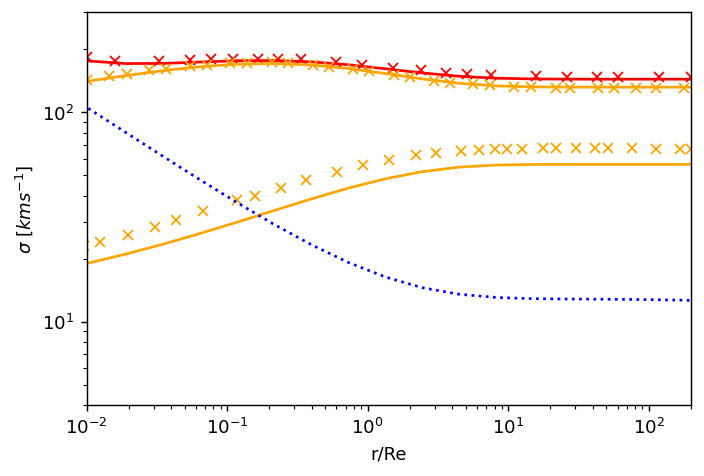

In [9]:
plt.figure(dpi=130)

# Total
rgb = 'red'
plt.plot(R_range/Re, sig_full, color = rgb)
plt.plot(ml_data_tot[:, 0], ml_data_tot[:, 1], 'x', color=rgb)

# Just stars
rgb = 'orange'
plt.plot(R_range/Re, sig_justStars, color = rgb)
plt.plot(mlap_data_stars[:, 0], mlap_data_stars[:, 1], 'x', color=rgb)

# Just DM
rbg = 'black'
plt.plot(R_range/Re, sig_justDM, color = rgb)
plt.plot(mlap_data_dm[:, 0], mlap_data_dm[:, 1], 'x', color=rgb)

# Just BH
rgb = 'blue'
plt.plot(R_range/Re, sig_justBH, ':', color = rgb)

plt.loglog()
plt.xlim([0.01, 200])
plt.ylim([4, 300])

plt.xlabel('r/Re')
plt.ylabel('$\sigma$ $[kms^{-1}]$')

plt.show()

In [10]:
sig_full =  SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile ='NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[True, False, True, True],
                mode = 2,
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")



sig_stars =  SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile ='NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[True, False, False, False],
                mode = 2,
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")



sig_DM = SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile ='NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[False, False, True, False],
                mode = 2,
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")


sig_BH = SigmaLib.Sigma(ApertureSize = R_range,
            Bulge_mass = SM,
              Bulge_Re = Re,
               Bulge_n = n,
            Bulge_Beta=0.0,
             Disk_mass=0.0,
     Disk_scale_length=0.0,
      Disk_inclination=0.0,
        HaloProfile ='NFW',
                HaloRs=rs,
              HaloRhos=rho,
         BlackHoleMass=BHMass,
          tracer_flags=[True, False],
   gravitational_flags=[False, False, False, True],
                mode = 2,
               threads=8,
          library_path="/Users/chris/Documents/ProjectSigma/VelocityDispersion/lib/libsigma.so")

In [11]:
gary_los_total = np.array([[0.011504251543300755, 170.62622393920498],
                            [0.03513589923688984, 181.92813059466033],
                            [0.13037464324715442, 182.84133853501163],
                            [0.713917567197192, 161.3763064151583],
                            [1.9300981708136171, 131.76489305600012],
                            [8.004747542457467, 92.29209846480178],
                            [19.24384479103208, 75.40184526773328],
                            [49.00208871959731, 57.43415596695461],
                            [96.75317735108129, 43.80427049217591],
                            [202.425907254344, 31.881123632109787]])

gary_los_stars = np.array([[0.010411438296474606, 151.97062747904553],
                            [0.012418731949703797, 153.6114052332903],
                            [0.016022158733950007, 157.0238658374628],
                            [0.019877835795548675, 160.54386172478974],
                            [0.030000221656846144, 166.86592801350744],
                            [0.03946210588175236, 168.5842046137986],
                            [0.059545615041311, 173.19716244670983],
                            [0.07457925242991267, 174.0092143013515],
                            [0.11139532189338582, 174.66965140293942],
                            [0.14936502883033306, 172.39457898767725],
                            [0.22963074928491076, 168.0657647782845],
                            [0.2902903627152564, 164.0076446131114],
                            [0.43746590012316283, 156.22931115563216],
                            [0.5529182747095923, 150.6944583509491],
                            [0.8006329811466816, 137.05070027081],
                            [1.0115294716370073, 129.15638467952024],
                            [1.4363266510411787, 117.47427553188002],
                            [1.8135969323935865, 106.91217914836056],
                            [2.5737001029269138, 93.90827491152737],
                            [3.1861176069723447, 84.48529325425604],
                            [4.263687906875841, 74.23121212356058],
                            [5.075672150458622, 66.79587485129268],
                            [6.788278578377591, 56.67674026925498],
                            [7.9260314999389, 51.601335786197886],
                            [11.906770736479048, 40.80921361002061],
                            [20.872324373692763, 28.37666632153256],
                            [33.204864836189635, 20.68137451030582],
                            [72.00108745955168, 12.349788317200112],
                            [112.32388158797036, 9.001615489506497],
                            [208.8057670041808, 6.257413427644087]])

gary_los_DM = np.array([[0.00990557814167836, 25.65320495260689],
                            [0.0230358071185879, 29.71303860655753],
                            [0.041522477821899106, 33.66745593914056],
                            [0.05914681053638977, 36.88402778320212],
                            [0.09858702071299719, 41.80933380421724],
                            [0.1848336823697854, 47.918224214783656],
                            [0.2847217214997773, 52.47555995576331],
                            [0.43449304860091575, 58.82135844590095],
                            [0.7028569648936701, 64.39974091614222],
                            [1.4807171380415376, 70.41315288529252],
                            [2.6663843202645876, 75.2777563814166],
                            [5.395319494450899, 76.77533946182703],
                            [9.88992807197213, 73.91644283283982],
                            [15.495821045957118, 69.58306850395371],
                            [30.06848785592886, 60.317521918716565],
                            [47.0656285176178, 53.57419460875866],
                            [72.20059432797139, 45.95793589495722],
                            [100.435769662642, 39.443911107693275],
                            [141.12817773560735, 34.447132521305804],
                            [206.0996495070494, 29.046253862952728]])

gary_los_BH = np.array([[0.009698292515493841, 73.9237478675818],
                        [0.1585833218274859, 18.479715419590484],
                        [2.4876770030691846, 4.018755266198833],
                        [3.6632171263254847, 3.10550059360334]])


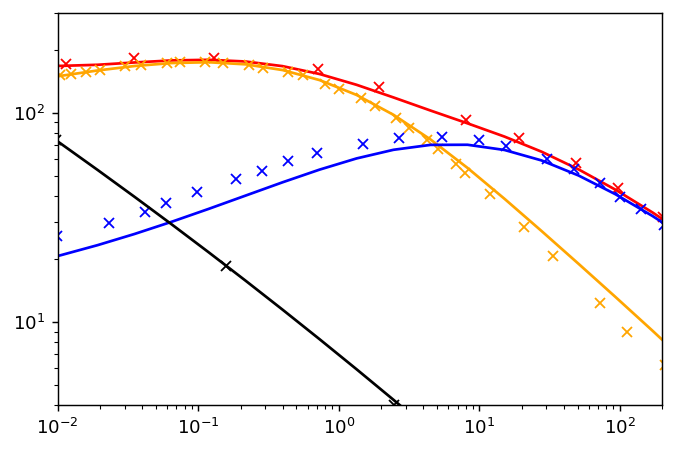

In [12]:
plt.figure(dpi=130)

# Total
rgb = 'red'
plt.plot(R_range/Re, sig_full, color = rgb)
plt.plot(gary_los_total[:, 0], gary_los_total[:, 1], 'x', color=rgb)

rgb = 'orange'
plt.plot(R_range/Re, sig_stars, color=rgb)
plt.plot(gary_los_stars[:, 0], gary_los_stars[:, 1], 'x', color=rgb)

rgb = 'blue'
plt.plot(R_range/Re, sig_DM, color=rgb)
plt.plot(gary_los_DM[:, 0], gary_los_DM[:, 1], 'x', color=rgb)

rgb = 'black'
plt.plot(R_range/Re, sig_BH, color=rgb)
plt.plot(gary_los_BH[:, 0], gary_los_BH[:, 1], 'x', color=rgb)

plt.loglog()
plt.xlim([0.01, 200])
plt.ylim([4, 300])

plt.show()